# ***PCA analysis***

**Objetivos**

- Reducir dimensionalidad.
- Identificar qué variables pesan más.
- Visualizar la estructura de los datos.
- Usarlo después para visualizar clusters más claramente.

**Contenidos**

- Escalado (el mismo del cluster)
- PCA fit → varianza explicada
- Plot de scree (gráfico de barras)
- Proyección PCA 2D y 3D

In [7]:
%load_ext kedro.ipython 

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [8]:
catalog.keys()


[
    'DataSetFIFA22',
    'DataSetFIFA21',
    'DataSetFIFA20',
    'preprocess_fifa_21',
    'preprocess_fifa_20',
    'FIFA22_processed_con_transformacion2_columns',
    'FIFA21_processed_con_transformacion2_columnss',
    'FIFA20_processed_con_transformacion2_columns',
    'grid_linear_model',
    'grid_linear_multiple_model',
    'grid_svr_model',
    'grid_decision_tree_model',
    'grid_randomforest_model',
    'grid_logistic_model_classification',
    'grid_knn_model_classification',
    'grind_svc_cv_model_classification',
    'grid_decision_tree_model_classification',
    'grid_random_forest_model_classification',
    'X_train_regression',
    'X_test_regression',
    'y_test_regression',
    'X_train_class',
    'X_test_class',
    'y_train_class',
    'y_test_class',
    'regression_report_linear_simple',
    'regression_report_linear_multiple',
    'regression_report_svr',
    'regression_report_decision_tree',
    'regression_report_randomforest',
    'report_logistic_mo

In [9]:
df_FIFA = catalog.load("model_input_table")
df_fifa_22 = catalog.load("preprocess_fifa_22")

[11/26/25 23:13:09] INFO     Loading data from model_input_table (ParquetDataset)...           ]8;id=299817;file:///usr/local/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=887752;file:///usr/local/lib/python3.11/site-packages/kedro/io/data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from preprocess_fifa_22 (ParquetDataset)...          ]8;id=632046;file:///usr/local/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=543891;file:///usr/local/lib/python3.11/site-packages/kedro/io/data_catalog.py#1046\1046]8;;\

#### **Importaciónes**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### **seleccionar features**

In [11]:
features = [
    "Age",
    "Overall",
    "Potential",
    "BallControl",
    "Dribbling",
    "Finishing",
    "ShortPassing",
    "Acceleration",
    "SprintSpeed",
    "Agility",
    "Stamina",
    "Strength",
]

X = df_fifa_22[features]


#### **Escalado**

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### **Entrenar PCA sin límite de componentes**

In [13]:
pca = PCA()
pca_fit = pca.fit(X_scaled)

explained_variance = pca_fit.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

#### **Gráfico: Varianza explicada y acumulada**

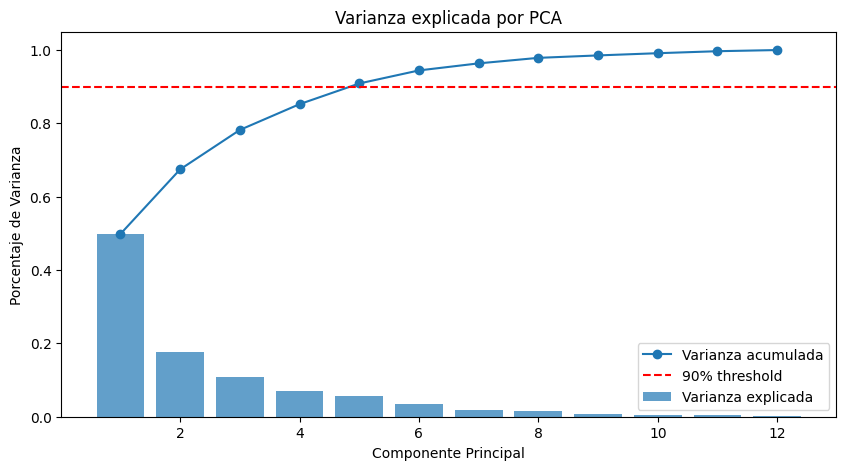

In [14]:
plt.figure(figsize=(10,5))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7, label="Varianza explicada")
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', label="Varianza acumulada")
plt.axhline(0.90, color='red', linestyle='--', label="90% threshold")
plt.xlabel("Componente Principal")
plt.ylabel("Porcentaje de Varianza")
plt.title("Varianza explicada por PCA")
plt.legend()
plt.show()

#### **Tabla de varianza explicada**

In [15]:
pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(len(explained_variance))],
    "Explained Variance": explained_variance,
    "Cumulative Variance": cumulative_variance
})

,PC,Explained Variance,Cumulative Variance
0,PC1,0.498219,0.498219
1,PC2,0.176297,0.674516
2,PC3,0.107584,0.782100
3,PC4,0.070291,0.852391
4,PC5,0.056452,0.908843
5,PC6,0.035589,0.944432
6,PC7,0.019262,0.963694
7,PC8,0.015035,0.978729
8,PC9,0.006638,0.985367
9,PC10,0.006041,0.991408


#### **Loadings (importancia de cada feature en cada PC)**

In [16]:
loadings = pd.DataFrame(
    pca_fit.components_.T,
    columns=[f"PC{i+1}" for i in range(len(explained_variance))],
    index=features
)

loadings


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Age,0.006541,0.504844,-0.402822,-0.414259,0.349027,-0.040352,-0.053089,-0.123230,0.164922,-0.489703,0.043625,-0.029154
Overall,0.174890,0.480472,0.354288,-0.247101,0.347962,-0.018108,0.075521,-0.088891,-0.123741,0.631272,-0.049093,0.027274
Potential,0.135946,0.092024,0.809711,-0.011772,-0.008240,0.045339,0.077322,0.041082,0.159783,-0.528951,0.036882,-0.028449
BallControl,0.379759,0.107783,-0.050049,-0.030476,-0.310444,-0.045101,-0.245781,-0.026735,0.273165,0.041969,-0.030609,0.777099
Dribbling,0.386486,0.000009,-0.068148,-0.076719,-0.256330,0.052833,-0.132438,-0.024783,0.622920,0.200548,-0.031562,-0.569388
Finishing,0.330674,0.022133,-0.133734,-0.209700,-0.299976,0.584168,0.546886,-0.120121,-0.280165,-0.069793,0.013163,0.004171
ShortPassing,0.349285,0.199301,-0.003675,-0.012966,-0.331912,-0.290120,-0.426173,0.004893,-0.613277,-0.130765,0.044209,-0.258752
Acceleration,0.334012,-0.285228,-0.021053,0.097529,0.381010,0.121746,-0.143612,-0.149643,-0.029222,0.017079,0.769567,0.027170
SprintSpeed,0.324765,-0.249491,-0.020411,0.216094,0.418360,0.218404,-0.231237,-0.336824,-0.088715,-0.112772,-0.612257,-0.008702
Agility,0.336838,-0.217027,-0.080925,-0.211032,0.260589,-0.093348,0.102118,0.823416,-0.049195,-0.029450,-0.139269,0.024713


#### **Bonus: gráfico de heatmap de loadings**

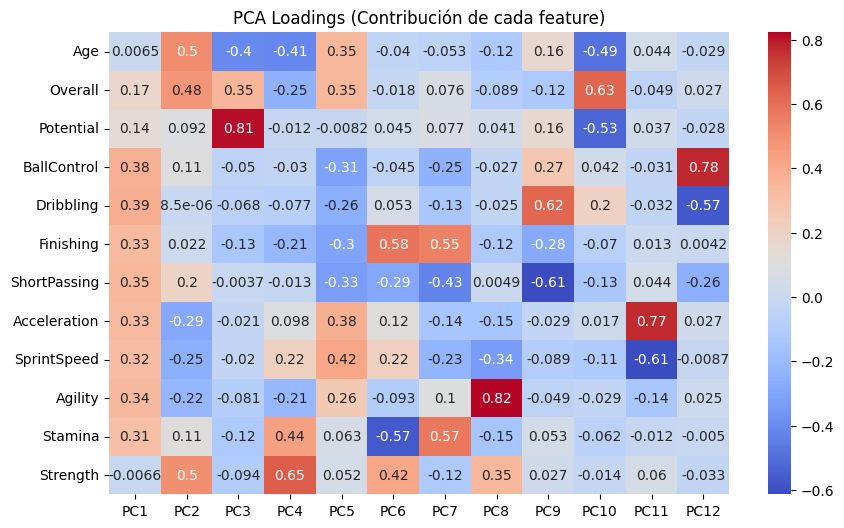

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(loadings, annot=True, cmap="coolwarm")
plt.title("PCA Loadings (Contribución de cada feature)")
plt.show()


#### **Reducir a 2 componentes para visualización**

In [18]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

df_fifa_22["PC1"] = X_pca_2[:, 0]
df_fifa_22["PC2"] = X_pca_2[:, 1]

#### **Scatterplot 2D**

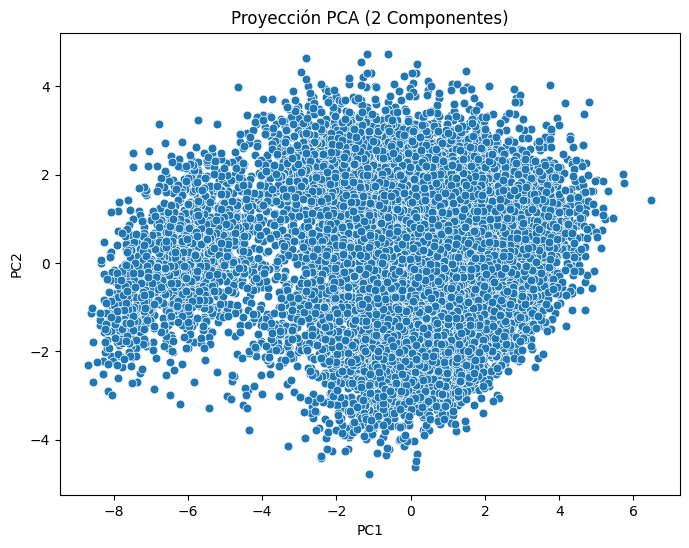

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1", y="PC2", data=df_fifa_22, s=40)
plt.title("Proyección PCA (2 Componentes)")
plt.show()


##### **Biplot**

- Uno de los gráficos MÁS relevantes para PCA.

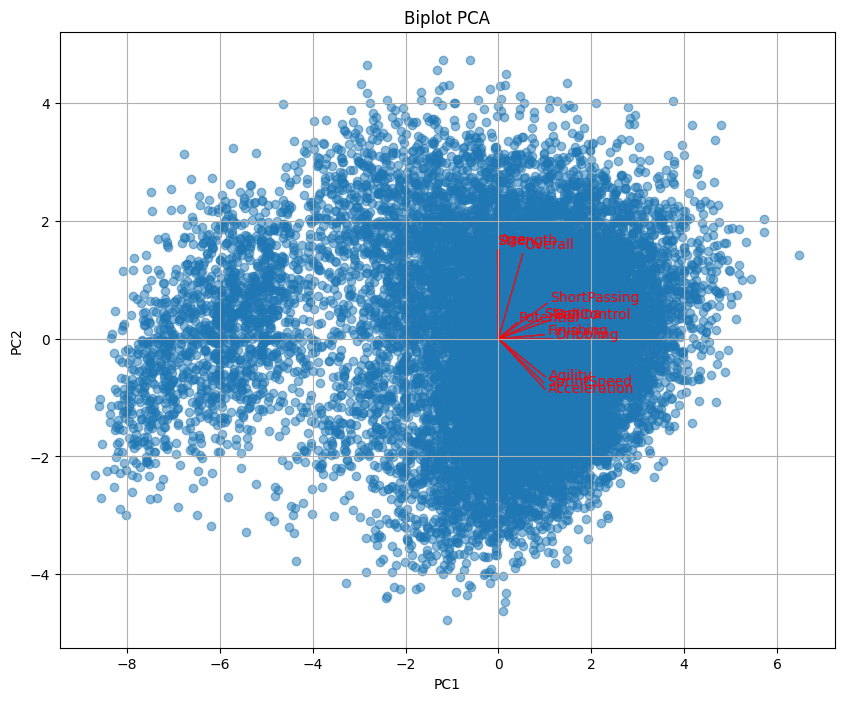

In [22]:
plt.figure(figsize=(10,8))

# Scatter
plt.scatter(df_fifa_22["PC1"], df_fifa_22["PC2"], alpha=0.5)

# Setas de loadings
for i, feature in enumerate(features):
    plt.arrow(0, 0, 
              loadings.iloc[i,0]*3, 
              loadings.iloc[i,1]*3, 
              color='red', alpha=0.7)
    plt.text(loadings.iloc[i,0]*3.2, 
             loadings.iloc[i,1]*3.2, 
             feature, color='red')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Biplot PCA")
plt.grid(True)
plt.show()


#### **PCA 3D** - (opcional)

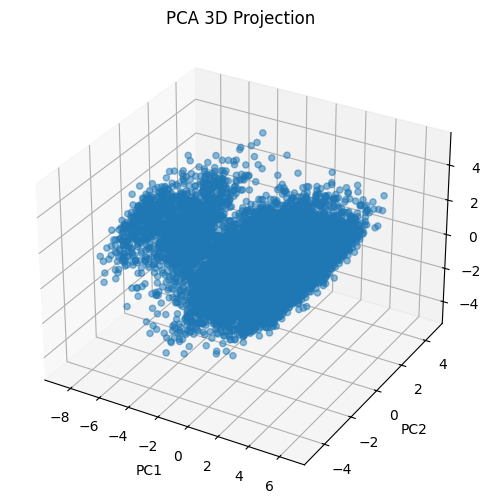

In [23]:
from mpl_toolkits.mplot3d import Axes3D

pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_scaled)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3[:,0], X_pca_3[:,1], X_pca_3[:,2], alpha=0.5)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("PCA 3D Projection")
plt.show()


#### **Visualizar clusters sobre PCA**

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_fifa_22["PC1"], y=df_fifa_22["PC2"], hue=df_fifa_22["KMeans_cluster"], palette="tab10")
plt.title("Clusters KMeans en Espacio PCA")
plt.show()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /usr/local/lib/python3.11/site-packages/pandas/core/indexes/base.py:3805 in get_loc              │
│                                                                                                  │
│   3802 │   │   """                                                                               │
│   3803 │   │   casted_key = self._maybe_cast_indexer(key)                                        │
│   3804 │   │   try:                                                                              │
│ ❱ 3805 │   │   │   return self._engine.get_loc(casted_key)                                       │
│   3806 │   │   except KeyError as err:                                                           │
│   3807 │   │   │   if isinstance(casted_key, slice) or (                                         │
│   3808 │   │   │   │   isinstance(casted_key, abc.Iterable)                                      │
│                                                                                                  │
│ in pandas._libs.index.IndexEngine.get_loc:167                                                    │
│                                                                                                  │
│ in pandas._libs.index.IndexEngine.get_loc:196                                                    │
│                                                                                                  │
│ in pandas._libs.hashtable.PyObjectHashTable.get_item:7081                                        │
│                                                                                                  │
│ in pandas._libs.hashtable.PyObjectHashTable.get_item:7089                                        │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'KMeans_cluster'

The above exception was the direct cause of the following exception:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:2                                                                                    │
│                                                                                                  │
│   1 plt.figure(figsize=(8,6))                                                                    │
│ ❱ 2 sns.scatterplot(x=df_fifa_22["PC1"], y=df_fifa_22["PC2"], hue=df_fifa_22["KMeans_cluster     │
│   3 plt.title("Clusters KMeans en Espacio PCA")                                                  │
│   4 plt.show()                                                                                   │
│   5                                                                                              │
│                                                                                                  │
│ /usr/local/lib/python3.11/site-packages/pandas/core/frame.py:4102 in __getitem__                 │
│                                                                                                  │
│    4099 │   │   if is_single_key:                                                                │
│    4100 │   │   │   if self.columns.nlevels > 1:                                                 │
│    4101 │   │   │   │   return self._getitem_multilevel(key)                                     │
│ ❱  4102 │   │   │   indexer = self.columns.get_loc(key)                                          │
│    4103 │   │   │   if is_integer(indexer):                                                      │
│    4104 │   │   │   │   indexer = [indexer]                                                      │
│    4105 │   │   else:                                                                            │
│                                                                                                  │
│ /usr/local/lib/python3.11/site-packages/pandas/core/indexes/ba

<Figure size 800x600 with 0 Axes>